In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # To get insights about images (to view them)
plt.gray() # As images are in grayscale

<Figure size 432x288 with 0 Axes>

In [2]:
## Read training data 
train = pd.read_csv('train.csv')

In [3]:
# Look at its description
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


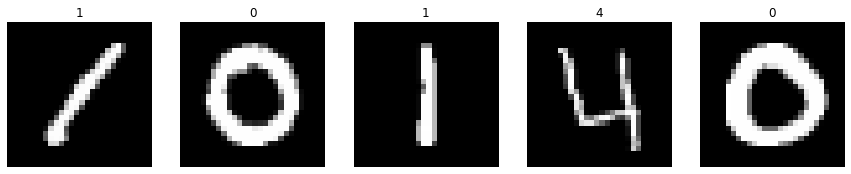

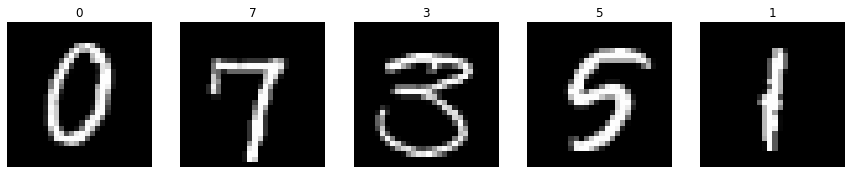

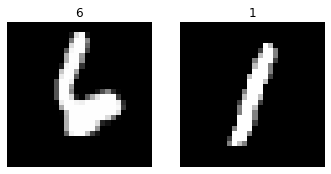

In [4]:
# View Images along with labels by whose index are in lookAt array 
lookAt = [0, 1, 2, 3, 4, 5, 6, 7, 8, 12, 26, 68]
Image = np.array(train.iloc[lookAt, 1:])
images = Image.reshape(len(lookAt), 28, 28)
label = np.array(train.iloc[lookAt, 0])

col = 5
for index, image in enumerate(images):
    if index%col == 0:
        fig = plt.figure(figsize=(15,16))
    fig.add_subplot(1,col,index%col+1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(label[index])

plt.show()

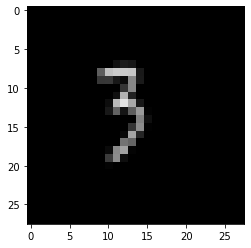

In [5]:
timg = plt.imread('gray.png')
plt.imshow(timg)

In [6]:
# Create training data 
train_Y = train["label"].values
train_X = train.drop('label', axis=1)
train_X = np.array(train_X, dtype=int)
train_X = train_X.reshape(train_X.shape[0], 28, 28,1)

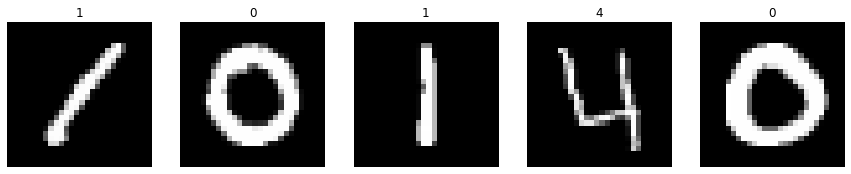

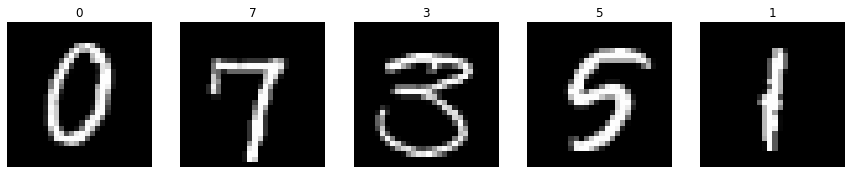

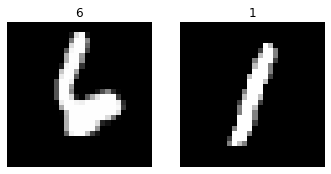

In [7]:
for index, image in enumerate(train_X[lookAt]):
    if index%col == 0:
        fig = plt.figure(figsize=(15,16))
    fig.add_subplot(1,col,index%col+1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(label[index])

plt.show()

In [ ]:
def prep_pixels(train):
    # convert from integers to floats
    train_norm = train.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    # return normalized images
    return train_norm

train_X = prep_pixels(train_X)

In [9]:
# Load the libraries for implementing CNN model 
import tensorflow as tf 
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten, Dense

In [10]:
# Create model 
model = tf.keras.Sequential([
    Conv2D(input_shape=(28,28,1), filters=8, strides=1, kernel_size=(5,5), activation = 'relu'),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Conv2D(filters=16, strides=1, kernel_size=(5,5), activation = 'relu'),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='relu')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          3216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [11]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits='true'),
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

In [12]:
model.fit(train_X, train_Y, epochs=23)

Epoch 1/23
1313/1313 [==============================] - 8s 6ms/step - loss: 2.2177 - sparse_categorical_accuracy: 0.1792
Epoch 2/23
1313/1313 [==============================] - 8s 6ms/step - loss: 2.0890 - sparse_categorical_accuracy: 0.1980
Epoch 3/23
1313/1313 [==============================] - 9s 7ms/step - loss: 1.5964 - sparse_categorical_accuracy: 0.4247
Epoch 4/23
1313/1313 [==============================] - 10s 8ms/step - loss: 1.4124 - sparse_categorical_accuracy: 0.4976
Epoch 5/23
1313/1313 [==============================] - 10s 7ms/step - loss: 1.2346 - sparse_categorical_accuracy: 0.5730
Epoch 6/23
1313/1313 [==============================] - 10s 8ms/step - loss: 1.2204 - sparse_categorical_accuracy: 0.5766
Epoch 7/23
1313/1313 [==============================] - 10s 8ms/step - loss: 1.2172 - sparse_categorical_accuracy: 0.5772
Epoch 8/23
1313/1313 [==============================] - 11s 9ms/step - loss: 1.2107 - sparse_categorical_accuracy: 0.5784
Epoch 9/23
1313/1313 [=====

In [126]:
import pickle
model.save('./../../backend/script/digit.h5')